# Lab 7. Análisis de Redes Sociales

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DS-Lab-07.git)

## Problema seleccionado
* Problema 1 (@traficogt)


# Carga de Datos

In [1]:
import json
import pandas as pd
import chardet

In [5]:
filePath = 'traficogt.txt'

#Detectar encoding
with open(filePath, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

tweets = []

#Abre el archivo con el encoding detectado
with open(filePath, 'r', encoding=encoding, errors='replace') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets.append(tweet)
        except json.JSONDecodeError:
            #Saltarse las lineas que no se pueden decodificar
            print(f"Error decoding JSON for line: {line}")
            continue

#Convertir a DataFrame
df = pd.DataFrame(tweets)

#Confirmar que se cargaron los datos
print(df.head())

Error decoding JSON for line: {"id": 1711127305131631071, "id_str": "1711127305131631071", "url": "https://x.com/nquevedoa/status/1711127305131631071", "date": "2023-10-08 21:11:55+00:00", "user": {"id": 204996481, "id_str": "204996481", "url": "https://x.com/nquevedoa", "username": "nquevedoa", "displayname": "Nelque", "rawDescription": "", "created": "2010-10-19 23:02:23+00:00", "followersCount": 218, "friendsCount": 111, "statusesCount": 228617, "favouritesCount": 199488, "listedCount": 2, "mediaCount": 530, "location": "Guatemala", "profileImageUrl": "https://pbs.twimg.com/profile_images/1013567326216687617/f7kWGWnp_normal.jpg", "profileBannerUrl": "https://pbs.twimg.com/profile_banners/204996481/1530488114", "protected": null, "verified": false, "blue": false, "blueType": null, "descriptionLinks": [], "pinnedIds": [], "_type": "snscrape.modules.twitter.User"}, "lang": "es", "rawContent": "@mildred_gaitan @jczamora @traficogt @ChepeZamora @el_Periodico @mmendoza_GT @cmendeza @JLFon

# Limpieza y preprocesamiento

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
#Definir función para limpiar los tweets
def cleanTweet(text):
    #Convertir a minúsculas
    text = text.lower()
    #Eliminar URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    #Eliminar menciones
    text = re.sub(r'@\w+', '', text)
    #Eliminar hashtags
    text = re.sub(r'#\w+', '', text)
    #Eliminar números
    text = re.sub(r'\d+', '', text)
    #Eliminar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenizar y eliminar stopwords
    tokens = word_tokenize(text)
    cleaned_text = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(cleaned_text)

In [8]:
#Aplcar la limpieza al campo 'rawContent'
df['cleaned_content'] = df['rawContent'].apply(cleanTweet)

In [9]:
#Verificar la data limpia
print(df[['rawContent', 'cleaned_content']].head())

                                          rawContent  \
0  Es comprensible la resolución... El ruso sabe ...   
1  La corrupción de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                     cleaned_content  
0  comprensible resolución ruso sabe engrasar maq...  
1  corrupción descarada falsificación documentos ...  
2                                                     
3                                                     
4  urgente zona deterioro tala inmoderada tráfico...  


# Análisis Exploratorio

In [10]:
#Número total de tweets
numTweets = len(df)
print(f"Número total de tweets: {numTweets}")

Número total de tweets: 5604


In [11]:
#Número de usuarios únicos
uniqueUsers = df['user'].apply(lambda x: x['username']).nunique()
print(f"Número total de usuarios únicos: {uniqueUsers}")

Número total de usuarios únicos: 2071


In [12]:
#Menciones y respuestas

#Extraer las menciones de la clave 'mentionedUsers'
df['mentions'] = df['mentionedUsers'].apply(lambda x: [user['username'] for user in x] if x else [])

#Extraer las respuestas
df['replies'] = df['inReplyToTweetId'].notnull()

#Calculo del número total de menciones y respuestas
numMentions = df['mentions'].apply(len).sum()
numReplies = df['replies'].sum()

print(f"Número total de menciones: {numMentions}")
print(f"Número total de respuestas: {numReplies}")


Número total de menciones: 10929
Número total de respuestas: 3991


In [13]:
from collections import Counter

#Extraer hashtags
hashtags = df['hashtags'].explode().dropna()
topHashtags = Counter(hashtags).most_common(10)

print("Hashtags más frecuentes:")
for tag, count in topHashtags:
    print(f"{tag}: {count}")

Hashtags más frecuentes:
AhoraLH: 18
AHORA: 18
Guatemala: 16
RenuncienGolpistas: 13
URGENTE: 10
guatemala: 9
ParoNacionalIndefinido: 9
Ahora: 8
LaHoraDeActualizarnos: 8
GuateResiste: 8


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

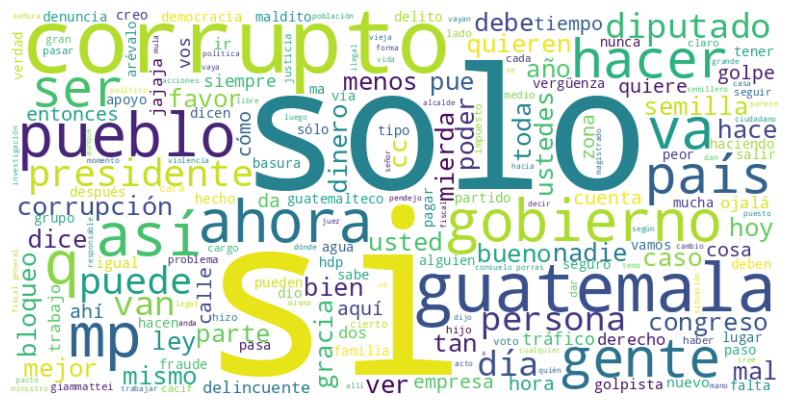

In [15]:
#Nube de palabras
allText = ' '.join(df['cleaned_content'].dropna())

#Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(allText)

#Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Preguntas interesantes

### 1. ¿Cuál es el impacto de las menciones y respuestas en la interacción entre usuarios?

In [16]:
import networkx as nx

In [17]:
#Crear un grafo dirigido
G = nx.DiGraph()

#Agregar aristas para menciones y respuestas
for index, row in df.iterrows():
    user = row['user']['username'].lower()

    #Agregar menciones como aristas
    for mention in row['mentions']:
        mentionUser = mention.lower()
        G.add_edge(user, mentionUser, interaction='mention')

    #Agregar respuesta como arista
    if row['replies']:
        repliedUser = row['inReplyToUser']['username'].lower() if row['inReplyToUser'] else None
        if repliedUser:
            G.add_edge(user, repliedUser, interaction='reply')

#Resumen de la red
print(f"Resumen de la red:")
print(f"Número de nodos (usuarios): {G.number_of_nodes()}")
print(f"Número de aristas (interacciones): {G.number_of_edges()}")

Resumen de la red:
Número de nodos (usuarios): 2720
Número de aristas (interacciones): 7383


In [18]:
#Usuarios más mencionados (mayor grado de entrada)
most_mentioned = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10]
print("Usuarios más mencionados:")
for user, mentions in most_mentioned:
    print(f"{user}: {mentions} menciones")

Usuarios más mencionados:
traficogt: 1892 menciones
barevalodeleon: 327 menciones
drgiammattei: 132 menciones
prensacomunitar: 121 menciones
mmendoza_gt: 109 menciones
mpguatemala: 102 menciones
lahoragt: 91 menciones
amilcarmontejo: 90 menciones
cc_guatemala: 79 menciones
muniguate: 65 menciones


Tras analizar las menciones y respuestas, encontramos que las cuentas dedicada al tráfico del país (@traficogt) y la del presidente (@barevalodeleon), son los más mencionados y generan una gran cantidad de interacciones. Esto sugiere que estos usuarios actúan como centros de información clave en el tráfico de la ciudad.

### 2. ¿Qué áreas o temas generan más tráfico de menciones?

In [19]:
from collections import Counter

In [20]:
#Extraer hashtags
hashtags = df['hashtags'].explode().dropna()
topHashtags = Counter(hashtags).most_common(10)

print("Hashtags más frecuentes:")
for tag, count in topHashtags:
    print(f"{tag}: {count} veces")

Hashtags más frecuentes:
AhoraLH: 18 veces
AHORA: 18 veces
Guatemala: 16 veces
RenuncienGolpistas: 13 veces
URGENTE: 10 veces
guatemala: 9 veces
ParoNacionalIndefinido: 9 veces
Ahora: 8 veces
LaHoraDeActualizarnos: 8 veces
GuateResiste: 8 veces


Los hashtags como #AhoraLH, #Guatemala y #RenuncienGolpistas aparecen frecuentemente, lo que indica que gran parte de los tweets suelen ser informativos o para expresar inconformidad con el tráfico del país.

### 3. ¿Hay algún patrón temporal en los tweets sobre el tráfico, como ciertos días u horas donde ocurren más atascos?

In [21]:
#Convertir la columna de fechas a tipo datetime si no está ya convertida
df['date'] = pd.to_datetime(df['date'])

In [22]:
#Agregar una columna de hora
df['hour'] = df['date'].dt.hour

In [23]:
#Contar la cantidad de tweets por hora del día
tweetsPerHour = df.groupby('hour').size()

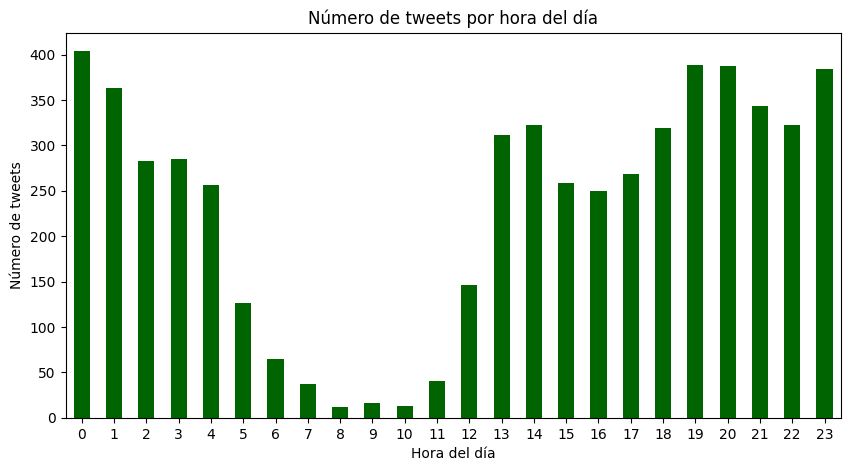

In [24]:
#Visualizar los resultados
import matplotlib.pyplot as plt

tweetsPerHour.plot(kind='bar', figsize=(10, 5), color='darkgreen')
plt.title('Número de tweets por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de tweets')
plt.xticks(rotation=0)
plt.show()

Los picos de tweets en las primeras horas de la madrugada y nuevamente en la tarde (particularmente entre las 5 p.m. y las 7 p.m.) sugieren que los problemas de tráfico están relacionados con las horas en las que las personas se desplazan para ir o regresar del trabajo. La alta actividad en la madrugada podría estar relacionada con accidentes o situaciones nocturnas inesperadas.

# Análisis de la topología de la red

## Construcción y visualización del grafo

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

In [26]:
#Crear un grafo dirigido
G = nx.DiGraph()

#Agregar aristas para menciones y respuestas
for index, row in df.iterrows():
    user = row['user']['username'].lower()

    #Agregar menciones como aristas
    for mention in row['mentions']:
        mentionUser = mention.lower()
        G.add_edge(user, mentionUser, interaction='mention')

    #Agregar respuesta como arista
    if row['replies']:
        repliedUser = row['inReplyToUser']['username'].lower() if row['inReplyToUser'] else None
        if repliedUser:
            G.add_edge(user, repliedUser, interaction='reply')

#Obtener los nodos más conectados
degreeDict = dict(G.degree(G.nodes))
sortedDegree = sorted(degreeDict.items(), key=lambda x: x[1], reverse=True)

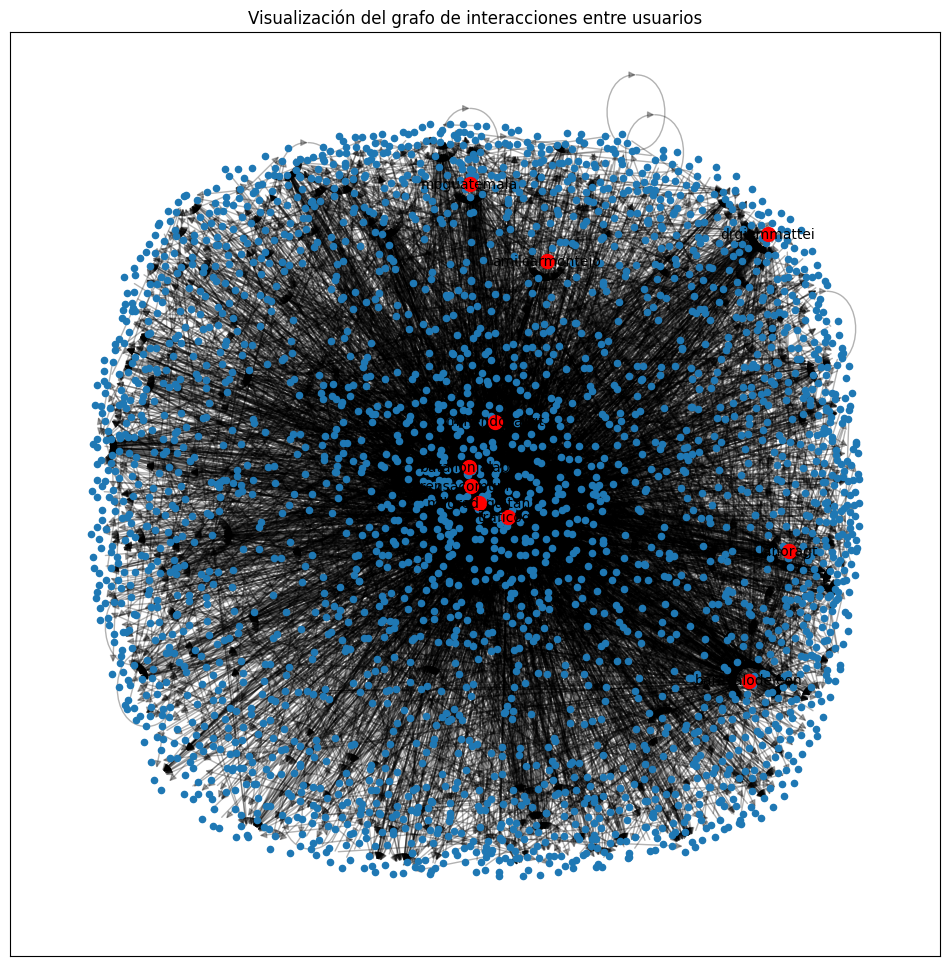

In [27]:
#Visualización del grafo
plt.figure(figsize=(12, 12))

#Posiciones para los nodos
pos = nx.spring_layout(G, k=0.15, iterations=20)

#Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_size=20)

#Dibujar las aristas
nx.draw_networkx_edges(G, pos, alpha=0.3)

#Resaltar los nodos más conectados
most_connected_nodes = [node for node, degree in sortedDegree[:10]]
nx.draw_networkx_nodes(G, pos, nodelist=most_connected_nodes, node_color='r', node_size=100)

#Mostrar los nodos más conectados
nx.draw_networkx_labels(G, pos, labels={node: node for node in most_connected_nodes}, font_size=10)

plt.title("Visualización del grafo de interacciones entre usuarios")
plt.show()

## Cálculo de métricas de red clave

In [28]:
#Calcular la densidad de la red
networkDensity = nx.density(G)
print(f"Densidad de la red: {networkDensity}")

Densidad de la red: 0.0009982854855807716


In [29]:
#Obtener las componentes fuertemente conectadas del grafo
largestStronglyConnectedComponent = max(nx.strongly_connected_components(G), key=len)

#Crear un subgrafo a partir de la componente más grande
subgraph = G.subgraph(largestStronglyConnectedComponent)

#Calcular la densidad de la componente más grande
networkDensity = nx.density(subgraph)
print(f"Densidad de la componente más grande: {networkDensity}")

#Calcular el diámetro de la componente fuertemente conectada más grande
networkDiameter = nx.diameter(subgraph)
print(f"Diámetro de la componente más grande: {networkDiameter}")

#Calcular el coeficiente de agrupamiento de la componente
clustering_coefficient = nx.average_clustering(subgraph)
print(f"Coeficiente de agrupamiento de la componente más grande: {clustering_coefficient}")

Densidad de la componente más grande: 0.30357142857142855
Diámetro de la componente más grande: 4
Coeficiente de agrupamiento de la componente más grande: 0.41755952380952377


In [30]:
#Calcular el coeficiente de agrupamiento medio
clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de agrupamiento promedio: {clustering_coefficient}")

Coeficiente de agrupamiento promedio: 0.11957980008403528


# Algoritmo detección de comunidades

In [61]:
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos y aristas basados en menciones
for index, row in df.iterrows():
    user_info = row['user']  # Diccionario del usuario

    # Asegúrate de que 'user_info' sea un diccionario y extrae el nombre de usuario
    if isinstance(user_info, dict) and 'username' in user_info:
        user = user_info['username']
        G.add_node(user)
    else:
        print(f"Usuario no válido en la fila {index}: {user_info}")

    # Agregar aristas basadas en menciones
    mentions = row['mentions']  # La columna de menciones
    if isinstance(mentions, list):
        for mention in mentions:
            if isinstance(mention, str) and mention:
                G.add_edge(user, mention)  # Agregar arista de usuario a la mención
            else:
                print(f"Mención no válida en la fila {index}: {mention}")

# Imprimir el número de nodos y aristas en el grafo
print("Número de nodos en G:", G.number_of_nodes())
print("Número de aristas en G:", G.number_of_edges())


Número de nodos en G: 2744
Número de aristas en G: 7286


In [64]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)

partition = {}
for i, com in enumerate(communities):
    for node in com:
        partition[node] = i


In [65]:
from collections import defaultdict

comunidad_info = defaultdict(lambda: {'nodos': [], 'interacciones': 0})

for node in partition:
    com = partition[node]
    comunidad_info[com]['nodos'].append(node)
    comunidad_info[com]['interacciones'] += G.degree[node]

# Imprimir información sobre las comunidades
for com, info in comunidad_info.items():
    print(f'Comunidad {com}: Nodos={len(info["nodos"])}, Interacciones={info["interacciones"]}')


Comunidad 0: Nodos=996, Interacciones=4428
Comunidad 1: Nodos=569, Interacciones=4381
Comunidad 2: Nodos=363, Interacciones=2254
Comunidad 3: Nodos=201, Interacciones=1107
Comunidad 4: Nodos=140, Interacciones=690
Comunidad 5: Nodos=102, Interacciones=550
Comunidad 6: Nodos=56, Interacciones=250
Comunidad 7: Nodos=50, Interacciones=236
Comunidad 8: Nodos=20, Interacciones=63
Comunidad 9: Nodos=20, Interacciones=39
Comunidad 10: Nodos=15, Interacciones=59
Comunidad 11: Nodos=14, Interacciones=36
Comunidad 12: Nodos=10, Interacciones=43
Comunidad 13: Nodos=9, Interacciones=33
Comunidad 14: Nodos=9, Interacciones=20
Comunidad 15: Nodos=8, Interacciones=30
Comunidad 16: Nodos=8, Interacciones=26
Comunidad 17: Nodos=8, Interacciones=17
Comunidad 18: Nodos=6, Interacciones=18
Comunidad 19: Nodos=5, Interacciones=14
Comunidad 20: Nodos=5, Interacciones=18
Comunidad 21: Nodos=5, Interacciones=26
Comunidad 22: Nodos=5, Interacciones=13
Comunidad 23: Nodos=4, Interacciones=14
Comunidad 24: Nodos

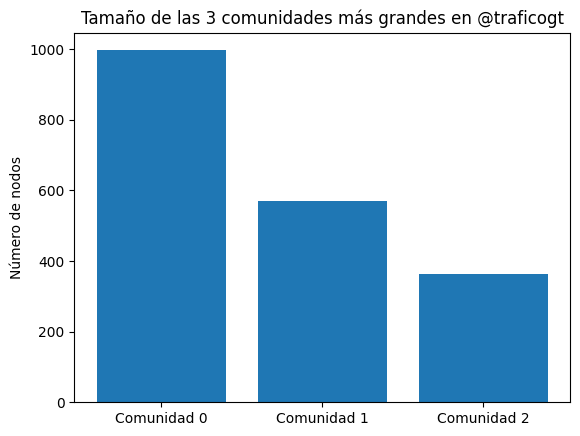

In [66]:
top_communities = sorted(comunidad_info.items(), key=lambda x: len(x[1]['nodos']), reverse=True)[:3]

# Graficar
sizes = [len(info['nodos']) for _, info in top_communities]
labels = [f'Comunidad {com[0]}' for com in top_communities]

plt.bar(labels, sizes)
plt.title('Tamaño de las 3 comunidades más grandes en @traficogt')
plt.ylabel('Número de nodos')
plt.show()


# Análisis de influencers y nodos clave

In [67]:
centralidad_grado = nx.degree_centrality(G)

usuarios_ordenados_grado = sorted(centralidad_grado.items(), key=lambda x: x[1], reverse=True)

print("Top 5 usuarios por centralidad de grado:")
for usuario, centralidad in usuarios_ordenados_grado[:5]:
    print(f"{usuario}: {centralidad:.4f}")


Top 5 usuarios por centralidad de grado:
traficogt: 0.7047
BArevalodeLeon: 0.1192
DrGiammattei: 0.0485
PrensaComunitar: 0.0467
mildred_gaitan: 0.0448


De esto, vemos que el usuario "traficogt" tiene la mayor centralidad de grado, con un valor de 0.7047. Lo que nos dice que tiene muchas conexiones directas en la red, lo que sugiere que es un actor clave en la comunicación y la difusión de información dentro de la comunidad analizada.


In [68]:
centralidad_intermediacion = nx.betweenness_centrality(G)

usuarios_ordenados_intermediacion = sorted(centralidad_intermediacion.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 usuarios por centralidad de intermediación:")
for usuario, centralidad in usuarios_ordenados_intermediacion[:5]:
    print(f"{usuario}: {centralidad:.4f}")



Top 5 usuarios por centralidad de intermediación:
traficogt: 0.8882
batallonjalapa: 0.0255
mildred_gaitan: 0.0232
BArevalodeLeon: 0.0214
JalenVelaz46026: 0.0137


Nuevamente, el usuario "traficogt" tiene la mayor centralidad de intermediación con un valor de 0.8882. Esto significa que es el usuario más influyente en términos de actuar como intermediario entre otros usuarios, lo que le permite facilitar la comunicación entre diferentes comunidades o grupos dentro de la red. Su papel como conector puede ser clave para la difusión de información.

In [69]:
centralidad_cercania = nx.closeness_centrality(G)

usuarios_ordenados_cercania = sorted(centralidad_cercania.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 usuarios por centralidad de cercanía:")
for usuario, centralidad in usuarios_ordenados_cercania[:5]:
    print(f"{usuario}: {centralidad:.4f}")



Top 5 usuarios por centralidad de cercanía:
traficogt: 0.7629
BArevalodeLeon: 0.4909
DrGiammattei: 0.4700
mmendoza_GT: 0.4674
MPguatemala: 0.4655


De nuevo, "traficogt" tiene el valor de cercanía más alto. Esto significa que es el usuario más accesible en la red, capaz de llegar rápidamente a otros nodos. Es decir, su alta centralidad de cercanía complementa su posición como un nodo central en términos de grado y intermediación, lo que sugiere que no solo tiene muchas conexiones, sino que también puede acceder a la mayoría de los demás usuarios de manera eficiente.

# Detección y análisis de grupos aislados

In [88]:
import networkx as nx

componentes = list(nx.connected_components(G))

print(f"Número de componentes conectados: {len(componentes)}")
for i, componente in enumerate(componentes):
    print(f"Tamaño del componente {i}: {len(componente)}")


Número de componentes conectados: 25
Tamaño del componente 0: 2720
Tamaño del componente 1: 1
Tamaño del componente 2: 1
Tamaño del componente 3: 1
Tamaño del componente 4: 1
Tamaño del componente 5: 1
Tamaño del componente 6: 1
Tamaño del componente 7: 1
Tamaño del componente 8: 1
Tamaño del componente 9: 1
Tamaño del componente 10: 1
Tamaño del componente 11: 1
Tamaño del componente 12: 1
Tamaño del componente 13: 1
Tamaño del componente 14: 1
Tamaño del componente 15: 1
Tamaño del componente 16: 1
Tamaño del componente 17: 1
Tamaño del componente 18: 1
Tamaño del componente 19: 1
Tamaño del componente 20: 1
Tamaño del componente 21: 1
Tamaño del componente 22: 1
Tamaño del componente 23: 1
Tamaño del componente 24: 1


In [89]:
grupos_aislados = [c for c in componentes if len(c) < 5]  # Cambia 5 por el umbral que desees
print(f"Número de grupos aislados: {len(grupos_aislados)}")


Número de grupos aislados: 24


In [90]:
for i, grupo in enumerate(grupos_aislados):
    nodos_grupo = list(grupo)
    tweets_grupo = df[df['user'].isin(nodos_grupo)]

    tema_counts_grupo = tweets_grupo['tema'].value_counts()
    print(f"Temas en el grupo aislado {i}:")
    print(tema_counts_grupo)


Temas en el grupo aislado 0:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 1:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 2:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 3:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 4:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 5:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 6:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 7:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 8:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 9:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 10:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 11:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 12:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 13:
Series([], Name: count, dtype: int64)
Temas en el grupo aislado 14:
Series([], Name: count, dtyp

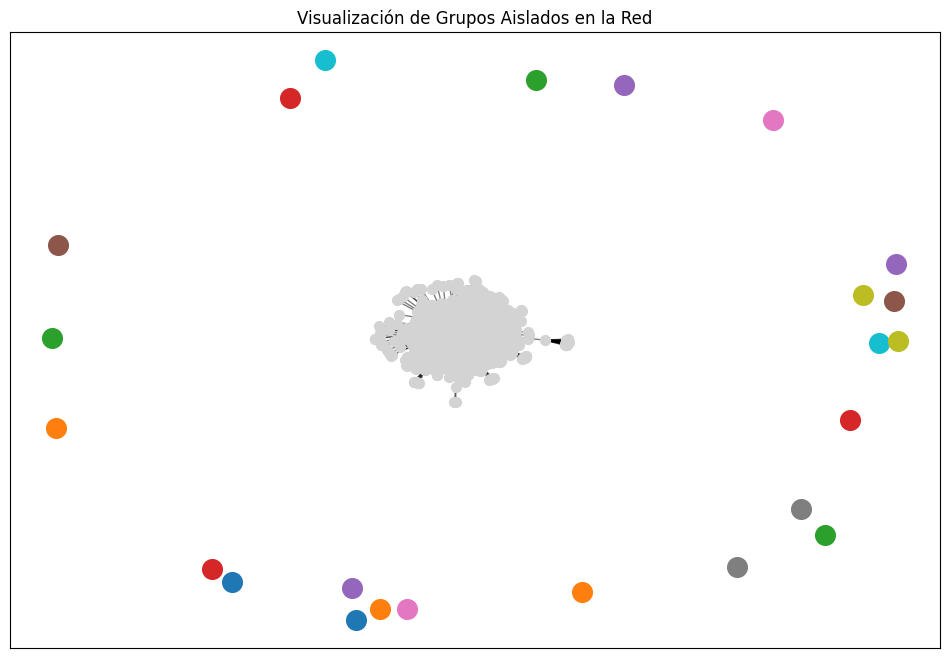

In [91]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightgray')

for i, componente in enumerate(componentes):
    if len(componente) < 5:
        nx.draw_networkx_nodes(G, pos, nodelist=componente, node_color=f"C{i}", node_size=200)

nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title("Visualización de Grupos Aislados en la Red")
plt.show()


# Análisis de contenido y sentimientos

In [70]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


In [72]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df['cleaned_content'].apply(lambda x: analyzer.polarity_scores(x))

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0.05 else
                                               ('negative' if x['compound'] < -0.05 else 'neutral'))


sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)


sentiment_label
neutral     5227
positive     281
negative      96
Name: count, dtype: int64


Como vemos acá, la mayoría de los tweets son catalogados como neutros, por lo que muchos de los mensajes no contienen opiniones fuertes o emociones, y pueden ser informativos o descriptivos. Esto puede reflejar un enfoque informativo o una falta de involucramiento emocional por parte de los usuarios en los temas discutidos.

In [73]:
!pip install gensim


In [74]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))  # Usar stopwords en español
df['tokens'] = df['cleaned_content'].apply(lambda x: [word for word in x.split() if word not in stop_words])

dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

for idx, topic in lda_model.print_topics(-1):
    print(f'Tema {idx}: {topic}')


Tema 0: 0.009*"q" + 0.009*"corruptos" + 0.007*"si" + 0.006*"solo" + 0.004*"ahora" + 0.004*"país" + 0.004*"guatemala" + 0.004*"mal" + 0.004*"infiltrados" + 0.004*"democracia"
Tema 1: 0.009*"si" + 0.008*"guatemala" + 0.005*"bloqueos" + 0.005*"solo" + 0.005*"así" + 0.005*"van" + 0.004*"pueblo" + 0.004*"gobierno" + 0.004*"golpe" + 0.003*"país"
Tema 2: 0.019*"si" + 0.005*"solo" + 0.005*"puede" + 0.005*"hacer" + 0.004*"pueblo" + 0.004*"tan" + 0.004*"corruptos" + 0.004*"q" + 0.003*"ser" + 0.003*"va"
Tema 3: 0.008*"si" + 0.007*"mp" + 0.005*"cc" + 0.004*"gracias" + 0.004*"guatemala" + 0.004*"nadie" + 0.004*"aquí" + 0.004*"fraude" + 0.003*"presidente" + 0.003*"solo"
Tema 4: 0.005*"calle" + 0.005*"zona" + 0.004*"manifestaciones" + 0.004*"presidente" + 0.003*"mp" + 0.003*"así" + 0.003*"pueblo" + 0.003*"bien" + 0.003*"cada" + 0.003*"avenida"


**¿Qué temas son los más recurrentes?**
De acá vemos que el tema principal es corrupción y democracia. Seguido de protestas y descontento social. Luego, empoderamiento y cambio, críticas a instituciones. Y por último, manifestaciones y espacios públicos.

In [85]:
def asignar_tema(tweet):
    if "corruptos" in tweet:
        return "Corrupción"
    elif "bloqueos" in tweet:
        return "Protestas"
    elif "puede" in tweet:
        return "Empoderamiento"
    elif "fraude" in tweet:
        return "Desconfianza"
    elif "manifestaciones" in tweet:
        return "Movilización"
    else:
        return None  # Devuelve None si no encaja en ninguna categoría

# Asignar temas a los tweets
df['tema'] = df['cleaned_content'].apply(asignar_tema)

# Eliminar filas sin tema asignado (None)
df = df[df['tema'].notnull()]


In [86]:
tema_counts = df.groupby(['community', 'tema']).size().unstack(fill_value=0)

print(tema_counts)


tema       Corrupción  Desconfianza  Empoderamiento  Movilización  Protestas
community                                                                   
0                  69            23              80             5         20
1                  79            17              35             7         18
2                   8             3              19             1          2
3                  13             4              14             2          7
4                  11             1               4             3          5
5                   8             2               3             0          1
6                   1             0               7             0          1
7                   2             0               3             3          0
8                   1             0               0             0          0
10                  0             0               1             0          0
13                  1             0               0             0          0

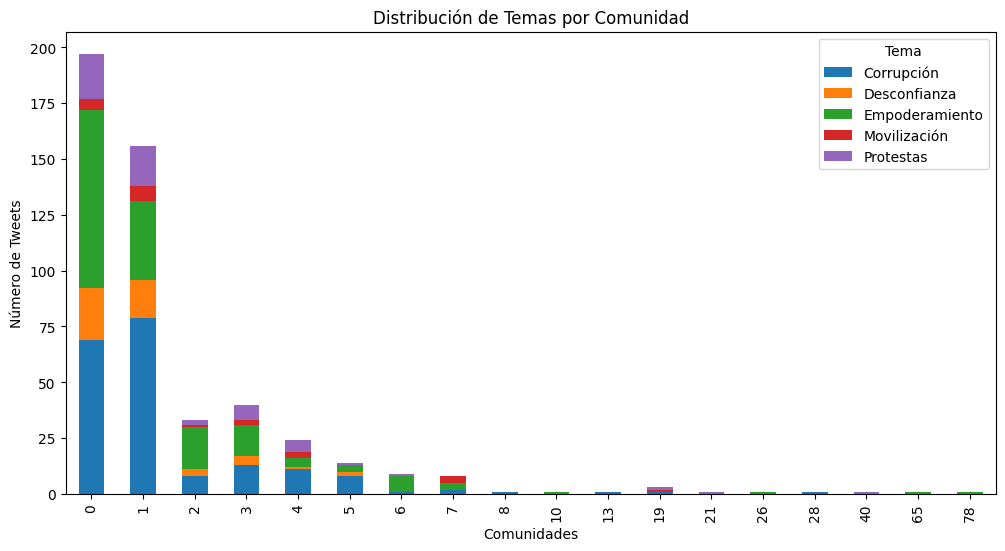

In [87]:
import matplotlib.pyplot as plt

tema_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Temas por Comunidad')
plt.xlabel('Comunidades')
plt.ylabel('Número de Tweets')
plt.legend(title='Tema')
plt.show()


**Cómo se relacionan estos temas con las comunidades
detectadas?**

Cómo vemos en la grafica anterior, el tema más recurrente en la comunidad 0, son las protestas. Y el tema más recurrente en la mayoría de las comunidades es el empoderamiento y corrupción.

# Interpretación y contexto

Después del análisis realizado, podemos observar que a interacción entre influencers y comunidades en redes sociales es fundamental para la formación de la opinión pública. Los influencers actúan como catalizadores, facilitando el acceso a información y estableciendo narrativas, mientras que las comunidades proporcionan un espacio para el debate, la organización y la solidificación de opiniones.

Entonces vemos que los influencers, en este caso, el usuario "traficogt", tienen una centralidad alta en términos de grado, intermediación y cercanía. Esto significa que tienen muchas conexiones directas y pueden actuar como puentes entre diferentes grupos en la red, facilitando la difusión de información y afectando la percepción de ciertos temas.